In [1]:
import pandas as pd
import sqlite3

df1 = pd.read_csv('SpecZ_Catalogue_20240124.csv')

file = open("hlsp_candels_hst_wfc3_goodss-tot-multiband_f160w_v1-1photom_cat.txt", "r")
headerList = []

for i in range(0, 72):
    headerItem = file.readline().split()
    headerList.append(headerItem[2])

file.close()

df2 = pd.read_csv('hlsp_candels_hst_wfc3_goodss-tot-multiband_f160w_v1-1photom_cat.txt', header=None, names=headerList, comment='#', delim_whitespace=True)
df2.columns = df2.columns.str.strip()
print(df2.keys())
print(df2)

C:\Users\redbr\AppData\Local\Temp\ipykernel_34496\2320304451.py:4: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('SpecZ_Catalogue_20240124.csv')
C:\Users\redbr\AppData\Local\Temp\ipykernel_34496\2320304451.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df2 = pd.read_csv('hlsp_candels_hst_wfc3_goodss-tot-multiband_f160w_v1-1photom_cat.txt', header=None, names=headerList, comment='#', delim_whitespace=True)


Index(['ID', 'IAU_Name', 'RA', 'DEC', 'F160W_LIMITING_MAGNITUDE', 'FLAGS',
       'CLASS_STAR', 'CTIO_U_FLUX', 'CTIO_U_FLUXERR', 'CTIO_U_WEIGHT',
       'VIMOS_U_FLUX', 'VIMOS_U_FLUXERR', 'VIMOS_U_WEIGHT', 'ACS_F435W_FLUX',
       'ACS_F435W_FLUXERR', 'ACS_F435W_WEIGHT', 'ACS_F606W_FLUX',
       'ACS_F606W_FLUXERR', 'ACS_F606W_WEIGHT', 'ACS_F775W_FLUX',
       'ACS_F775W_FLUXERR', 'ACS_F775W_WEIGHT', 'ACS_F814W_FLUX',
       'ACS_F814W_FLUXERR', 'ACS_F814W_WEIGHT', 'ACS_F850LP_FLUX',
       'ACS_F850LP_FLUXERR', 'ACS_F850LP_WEIGHT', 'WFC3_F098M_FLUX',
       'WFC3_F098M_FLUXERR', 'WFC3_F098M_WEIGHT', 'WFC3_F105W_FLUX',
       'WFC3_F105W_FLUXERR', 'WFC3_F105W_WEIGHT', 'WFC3_F125W_FLUX',
       'WFC3_F125W_FLUXERR', 'WFC3_F125W_WEIGHT', 'WFC3_F160W_FLUX',
       'WFC3_F160W_FLUXERR', 'WFC3_F160W_WEIGHT', 'ISAAC_KS_FLUX',
       'ISAAC_KS_FLUXERR', 'ISAAC_KS_WEIGHT', 'HAWKI_KS_FLUX',
       'HAWKI_KS_FLUXERR', 'HAWKI_KS_WEIGHT', 'IRAC_CH1_FLUX',
       'IRAC_CH1_FLUXERR', 'IRAC_CH1_WEIGH

In [15]:
import pandas as pd
from astroML.crossmatch import crossmatch_angular
import sqlite3

df1 = pd.read_csv('SpecZ_Catalogue_20240124.csv')

df2 = pd.read_csv('tableSPlus_corrected.txt', sep=",", header=0)
df2.columns = df2.columns.str.strip()

cols1 = df1.columns.tolist()

cols1 = cols1[:2]
df1_Coords = df1[cols1]

cols2 = df2.columns.tolist()

cols2 = cols2[3:5]
df2_Coords = df2[cols2]

print(df1_Coords.values)

['RA', 'DEC', 'z', 'e_z', 'f_z', 'class_spec', 'original_class_spec', 'source']
['RA', 'DEC', 'ID', 'IAU_Name', 'F160W_LIMITING_MAGNITUDE', 'FLAGS', 'CLASS_STAR', 'CTIO_U_FLUX', 'CTIO_U_FLUXERR', 'CTIO_U_WEIGHT', 'VIMOS_U_FLUX', 'VIMOS_U_FLUXERR', 'VIMOS_U_WEIGHT', 'ACS_F435W_FLUX', 'ACS_F435W_FLUXERR', 'ACS_F435W_WEIGHT', 'ACS_F606W_FLUX', 'ACS_F606W_FLUXERR', 'ACS_F606W_WEIGHT', 'ACS_F775W_FLUX', 'ACS_F775W_FLUXERR', 'ACS_F775W_WEIGHT', 'ACS_F814W_FLUX', 'ACS_F814W_FLUXERR', 'ACS_F814W_WEIGHT', 'ACS_F850LP_FLUX', 'ACS_F850LP_FLUXERR', 'ACS_F850LP_WEIGHT', 'WFC3_F098M_FLUX', 'WFC3_F098M_FLUXERR', 'WFC3_F098M_WEIGHT', 'WFC3_F105W_FLUX', 'WFC3_F105W_FLUXERR', 'WFC3_F105W_WEIGHT', 'WFC3_F125W_FLUX', 'WFC3_F125W_FLUXERR', 'WFC3_F125W_WEIGHT', 'WFC3_F160W_FLUX', 'WFC3_F160W_FLUXERR', 'WFC3_F160W_WEIGHT', 'ISAAC_KS_FLUX', 'ISAAC_KS_FLUXERR', 'ISAAC_KS_WEIGHT', 'HAWKI_KS_FLUX', 'HAWKI_KS_FLUXERR', 'HAWKI_KS_WEIGHT', 'IRAC_CH1_FLUX', 'IRAC_CH1_FLUXERR', 'IRAC_CH1_WEIGHT', 'IRAC_CH2_FLUX', 'IR

In [32]:
from astroML.crossmatch import crossmatch_angular
import numpy as np

# get imaging data
imX = np.empty((len(df1), 2), dtype=np.float64)
imX[:, 0] = df1['RA']
imX[:, 1] = df1['DEC']

# get standard stars
stX = np.empty((len(df2), 2), dtype=np.float64)
stX[:, 0] = df2['RA']
stX[:, 1] = df2['DEC']

# crossmatch catalogs
max_radius = 1/3600  # 1 arcsec
# note, that for the below to work the first 2 columns of the catalogs should be ra, dec
# also, df_1 should be the longer of the 2 catalogs, else there will be index errors
dist, ind = crossmatch_angular(imX, stX, max_radius)
match = ~np.isinf(dist)

df_crossed = df1[match]

print(df_crossed)

df_crossed.to_csv('ultraVISTACrossmatch.txt', index=False)

Empty DataFrame
Columns: [RA, DEC, z, e_z, f_z, class_spec, original_class_spec, source]
Index: []


Bagpipes: Latex distribution not found, plots may look strange.
Bagpipes: PyMultiNest import failed, fitting will use the Nautilus sampler instead.
This objects' information is 
ID: 1746.0
RA: 53.1761083
DEC: -27.902354


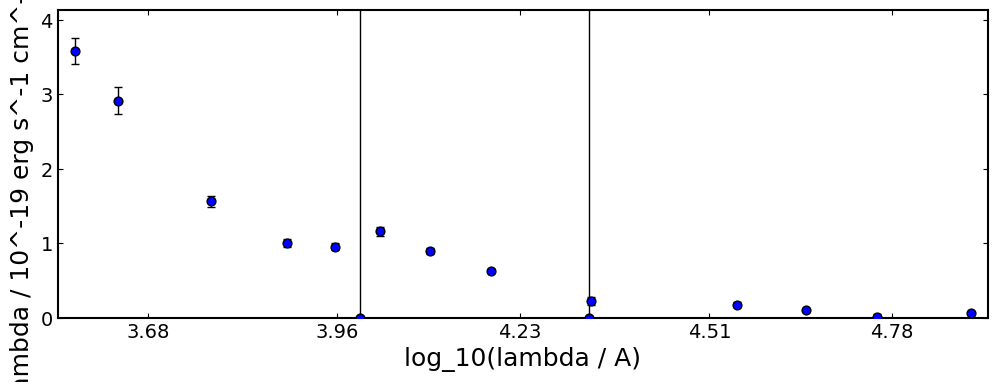

MultiNest not available. Switching to nautilus.

Bagpipes: fitting object 01746


Completed in 433.6 seconds.

Parameter                          Posterior percentiles
                                16th       50th       84th
----------------------------------------------------------
dblplaw:age                    2.396      6.980     12.170
dblplaw:alpha                585.956    794.841    949.330
dblplaw:beta                 711.356    860.023    956.388
dblplaw:massformed             7.038      7.108      7.286
dblplaw:metallicity            1.133      1.463      1.774
dblplaw:tau                    9.086      9.729      9.930
dust:Av                        0.805      0.848      0.897
redshift                       0.311      0.333      0.410




c:\Users\redbr\AppData\Local\Programs\Python\Python311\Lib\site-packages\bagpipes\models\star_formation_history.py:278: RuntimeWarning: overflow encountered in power
  sfr[mask] = ((t/tau)**alpha + (t/tau)**-beta)**-1


In [1]:
import numpy as np
import bagpipes as pipes

def load_Splus(ID):
    """ Load UltraVISTA photometry from catalogue. """

    # load up the relevant columns from the catalogue.
    cat = np.loadtxt("hlsp_candels_hst_wfc3_goodss-tot-multiband_f160w_v1-1photom_cat.txt",
                     usecols=(10, 13, 16, 19, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55,
                              11, 14, 17, 20, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56))

    # Find the correct row for the object we want.
    row = int(ID) - 1

    #Get our objects' ID
    objectInfoList = np.loadtxt('hlsp_candels_hst_wfc3_goodss-tot-multiband_f160w_v1-1photom_cat.txt', usecols=(0, 2, 3))
    print(f'This objects\' information is \nID: {objectInfoList[row, 0]}\nRA: {objectInfoList[row, 1]}\nDEC: {objectInfoList[row, 2]}')


    # Extract the object we want from the catalogue.
    fluxes = cat[row, :15]
    fluxerrs = cat[row, 15:]

    # Turn these into a 2D array.
    photometry = np.c_[fluxes, fluxerrs]

    # blow up the errors associated with any missing fluxes.
    for i in range(len(photometry)):
        if (photometry[i, 0] == 0.) or (photometry[i, 1] <= 0):
            photometry[i,:] = [0., 9.9*10**99.]
            
    # Enforce a maximum SNR of 20, or 10 in the IRAC channels.
    for i in range(len(photometry)):
        if i < 10:
            max_snr = 20.
            
        else:
            max_snr = 10.
        
        if photometry[i, 0]/photometry[i, 1] > max_snr:
            photometry[i, 1] = photometry[i, 0]/max_snr

    return photometry


goodss_filt_list = np.loadtxt("filters1/goodss_filt_list.txt", dtype="str")

galaxy = pipes.galaxy("01746", load_Splus, spectrum_exists=False, filt_list=goodss_filt_list)
fig = galaxy.plot()

dpl = {}
dpl["age"] = (0.1, 15.)

dpl["tau"] = (0.3, 10.)
dpl["massformed"] = (1., 15.)
dpl["metallicity"] = (0., 2.5)
dpl["alpha"] = (0, 1000)
dpl["beta"] = (0, 1000)

dust = {}
dust["type"] = "Calzetti"
dust["Av"] = (0., 2.)

fit_instructions = {}
fit_instructions["redshift"] = (0., 1)
fit_instructions["dblplaw"] = dpl
fit_instructions["dust"] = dust

fit = pipes.fit(galaxy, fit_instructions)

fit.fit(verbose=False)

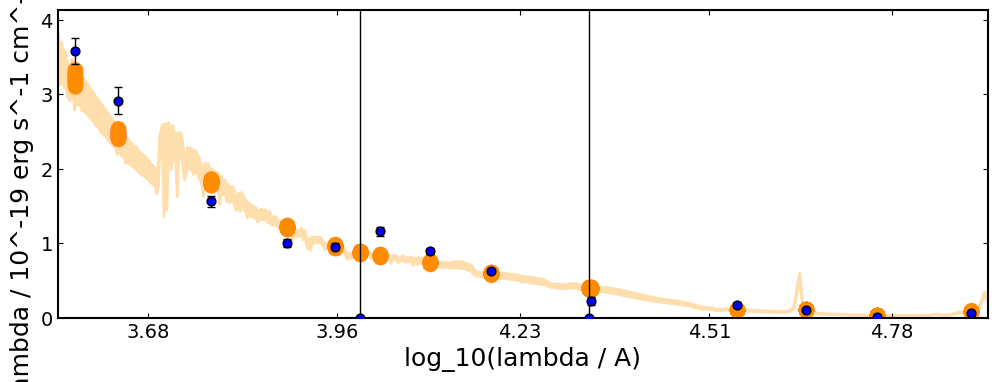

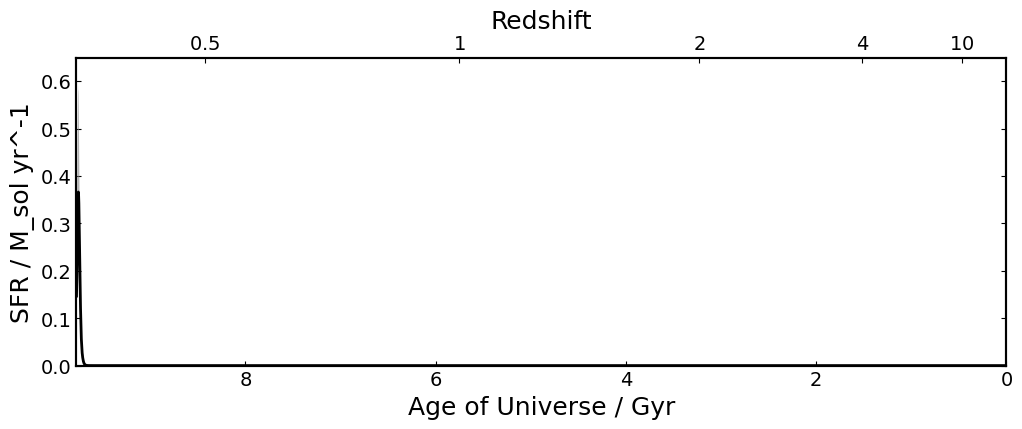

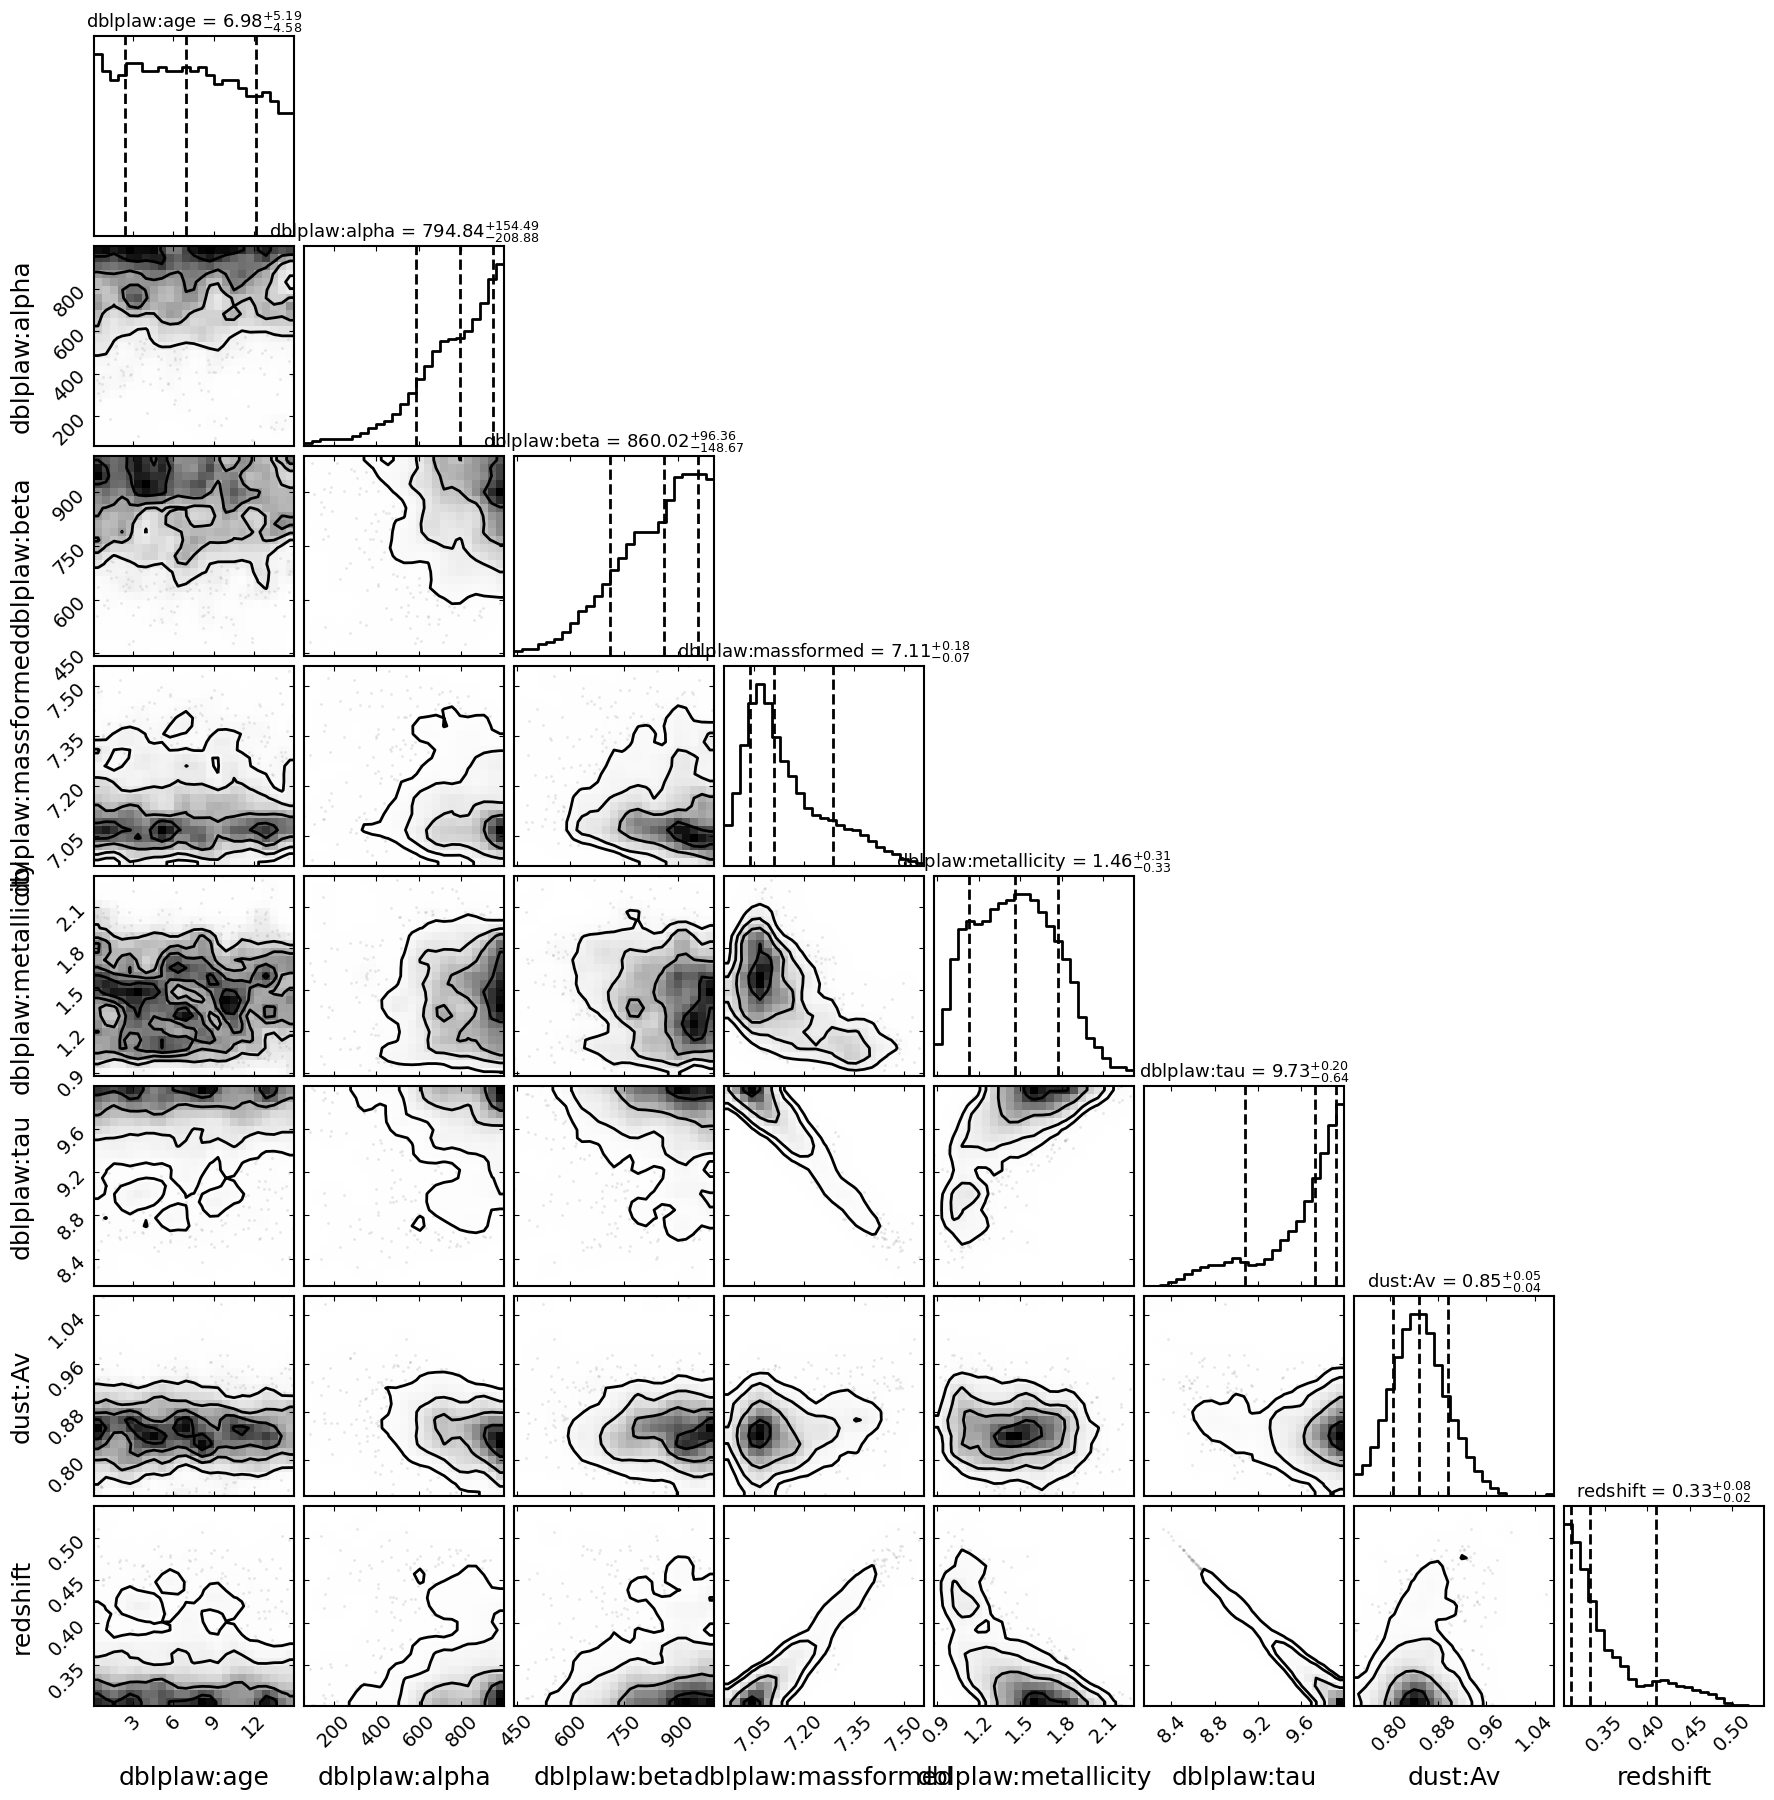

In [2]:
fig = fit.plot_spectrum_posterior(save=False, show=True)
fig = fit.plot_sfh_posterior(save=False, show=True)
fig = fit.plot_corner(save=False, show=True)